### PRE - PROCESSING

In [19]:
import cv2
import numpy as np
from skimage import io , img_as_float
from skimage.filters import median

img_salt_pepper_noise = cv2.imread( "C:/tumour3.png", 0)
img = img_salt_pepper_noise

median_using_cv2 = cv2.medianBlur(img, 3)

from skimage.morphology import disk
median_using_skimage = median(img, disk(3), mode='constant', cval = 0.0)

cv2.imshow("Original", img)
cv2.imshow("cv2filter", median_using_cv2)
cv2.imshow("skimage filter", median_using_skimage)
cv2.waitKey(0)
cv2.destroyAllWindows()

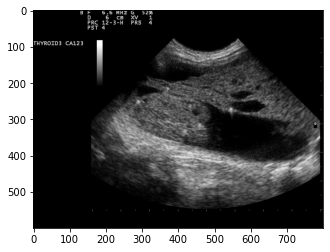

In [1]:
import cv2
from skimage import io
from matplotlib import pyplot as plt
image = cv2.imread("C:/benign/tumour.png", 1) 
plt.imshow(image)

### CONTRAST RESOLUTION

(array([2.72665e+05, 6.75700e+03, 6.04600e+03, 5.73200e+03, 5.57100e+03,
        3.57900e+03, 3.55300e+03, 1.74700e+03, 1.66900e+03, 5.26600e+03,
        5.25800e+03, 0.00000e+00, 3.40600e+03, 3.35600e+03, 3.27200e+03,
        3.28600e+03, 3.22800e+03, 1.75000e+03, 5.08900e+03, 1.75900e+03,
        3.51900e+03, 3.45800e+03, 3.61900e+03, 5.51300e+03, 1.82500e+03,
        3.75600e+03, 3.85700e+03, 5.63900e+03, 0.00000e+00, 5.70300e+03,
        5.44400e+03, 1.82600e+03, 3.68200e+03, 3.52000e+03, 5.10400e+03,
        3.37300e+03, 3.22800e+03, 1.67700e+03, 4.60700e+03, 3.03000e+03,
        2.96100e+03, 4.00700e+03, 2.48000e+03, 2.38700e+03, 2.32100e+03,
        3.34800e+03, 2.09100e+03, 1.01700e+03, 1.89100e+03, 2.69700e+03,
        1.75700e+03, 1.56700e+03, 2.36800e+03, 1.51500e+03, 1.54800e+03,
        1.57200e+03, 2.41300e+03, 1.55700e+03, 1.47000e+03, 1.30700e+03,
        2.03600e+03, 1.86300e+03, 1.20300e+03, 1.66100e+03, 5.31000e+02,
        1.48700e+03, 9.51000e+02, 1.19300e+03, 3.83

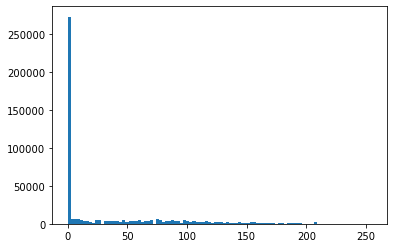

In [2]:
lab_img = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

l , a, b = cv2.split(lab_img)

equ = cv2.equalizeHist(l)

plt.hist(l.flat, bins=100, range=(0,255))

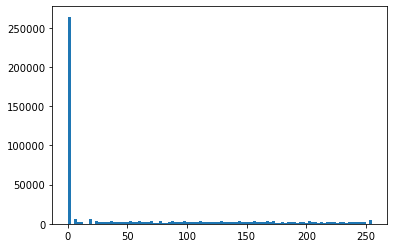

In [3]:
plt.hist(equ.flat, bins=100, range=(0,255))
equ = cv2.equalizeHist(l)

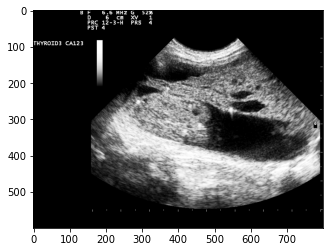

In [4]:
plt.imshow(equ, cmap='gray')

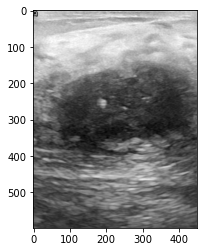

In [20]:
import cv2
from skimage import io
from matplotlib import pyplot as plt
image = cv2.imread("C:/tumour3.png", 1) 
plt.imshow(image)

lab_img = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

l , a, b = cv2.split(lab_img)

equ = cv2.equalizeHist(l)

updated_lab_img1 = cv2.merge((equ,a,b))
hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)

updated_lab_img2 = cv2.merge((clahe_img,a,b))
CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)

cv2.imshow("Original image",image)
cv2.imshow("Equalized image", hist_eq_img)
cv2.imshow("CLAHE image", CLAHE_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### IMAGE SHARPENING

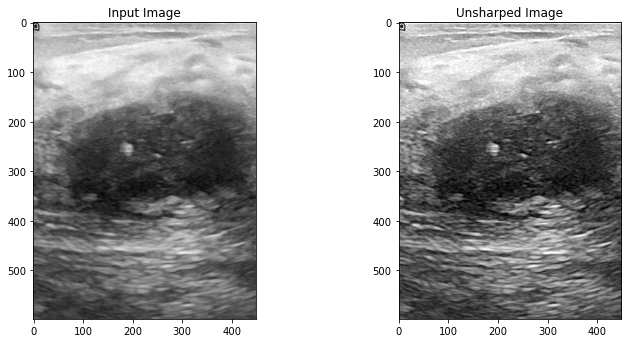

In [21]:
from skimage import io
from skimage.filters import unsharp_mask

img = io.imread("C:/tumour3.png")

unsharped_img = unsharp_mask(img, radius=3, amount=1.0)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(unsharped_img,cmap='gray')
ax2.title.set_text('Unsharped Image')

plt.show()

### IMAGE ENHANCEMENT

In [22]:
from PIL import Image
from PIL import ImageEnhance
  
# Opens the image file
image = Image.open('C:/tumour3.png')
  
# shows image in image viewer
image.show()
  
# Enhance Color Level
curr_col = ImageEnhance.Color(image)
new_col = 2.5
  
# Color level enhanced by a factor of 2.5
img_colored = curr_col.enhance(new_col)
  
# shows updated image in image viewer
img_colored.show()
from PIL import Image
from PIL import ImageEnhance
  
# Opens the image file
image = Image.open('C:/benign/tumour.png')
  
# shows image in image viewer
image.show()
  
# Enhance Color Level
curr_col = ImageEnhance.Color(image)
new_col = 2.5
  
# Color level enhanced by a factor of 2.5
img_colored = curr_col.enhance(new_col)
  
# shows updated image in image viewer
img_colored.show()

(598, 449, 3)


Text(0.5, 1.0, 'Final Output Image')

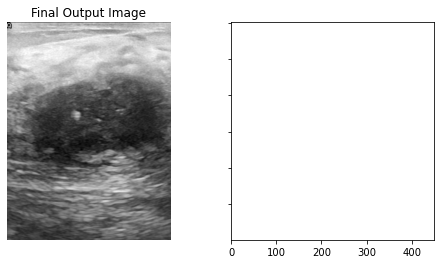

In [23]:
import matplotlib.pyplot as plt
from skimage import io, color, restoration, img_as_float
from skimage.feature import hog
from skimage import data, exposure

img = io.imread('C:/tumour3.png', as_gray=False)
print(img.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Final Output Image')

(600, 800, 3)
    Size of normal thyroid Gland: 100-480 
    Volume of normal thyroid Gland: 700-1000
    Weight of normal thyroid Gland: 1-20
Observed reading
 Size of thyroid Gland: 600
 Volume of thyroid Gland: 800
 Weight of thyroid Gland: 3
Result:
Thyroid detected


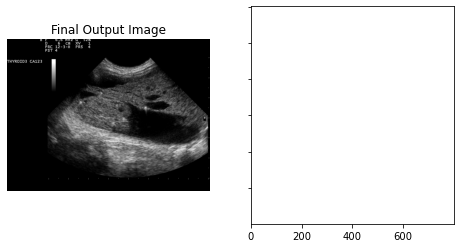

In [7]:
import matplotlib.pyplot as plt
from skimage import io, color, restoration, img_as_float
from skimage.feature import hog
from skimage import data, exposure

img = io.imread('C:/Ultrasound_Scan.png', as_gray=False)
print(img.shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Final Output Image')

print ("    " +"Size of normal thyroid Gland: 100-480 ")
print ("    " +"Volume of normal thyroid Gland: 700-1000")
print ("    " +"Weight of normal thyroid Gland: 1-20")
print("Observed reading")
my_list=img.shape
size =my_list[0]
v=my_list[1]
w=my_list[2]

print (f" Size of thyroid Gland: {size}")
print (f" Volume of thyroid Gland: {v}")
print (f" Weight of thyroid Gland: {w}")
print("Result:")
if(((size>=100) and (size<=480)) and ((v>=700) and (v<=1000)) and ((w>=1) and (w<=20))):
   print("Thyroid not detected")
else:
   print("Thyroid detected")
